## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2002-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='google', start='2002-1-1')['Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3904 entries, 2002-01-02 to 2017-07-05
Data columns (total 5 columns):
BP      3904 non-null float64
F       3904 non-null float64
XOM     3904 non-null float64
LNC     3904 non-null float64
AAPL    3903 non-null float64
dtypes: float64(5)
memory usage: 183.0 KB


In [4]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2002-01-02,46.05,16.22,39.60,48.30,1.66
2002-01-03,46.07,16.73,39.66,49.08,1.68
2002-01-04,46.28,16.94,40.00,49.93,1.69
2002-01-07,45.75,16.50,39.65,49.50,1.64
2002-01-08,45.19,16.56,39.70,49.45,1.62


In [5]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2017-06-28,35.27,11.09,81.53,66.63,145.83
2017-06-29,34.86,11.17,80.70,67.27,143.68
2017-06-30,34.65,11.19,80.73,67.58,144.02
2017-07-03,35.02,11.56,82.10,69.11,143.50
2017-07-05,34.42,11.30,80.85,68.96,144.09


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [6]:
mydata.iloc[0]

BP      46.05
F       16.22
XOM     39.60
LNC     48.30
AAPL     1.66
Name: 2002-01-02 00:00:00, dtype: float64

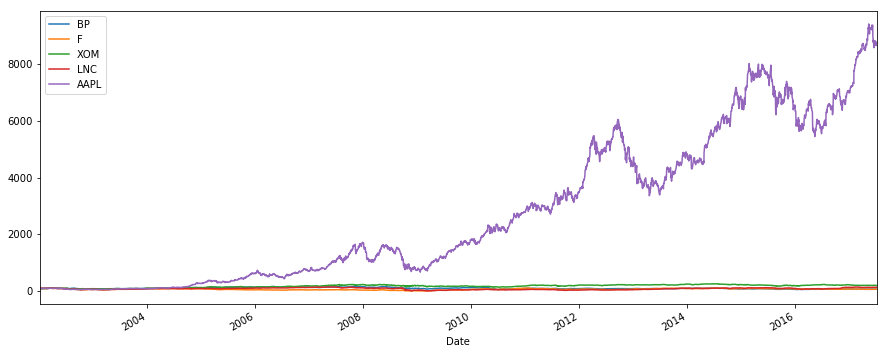

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [8]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2002-01-02,NaN,NaN,NaN,NaN,NaN
2002-01-03,0.000434,0.031443,0.001515,0.016149,0.012048
2002-01-04,0.004558,0.012552,0.008573,0.017319,0.005952
2002-01-07,-0.011452,-0.025974,-0.008750,-0.008612,-0.029586
2002-01-08,-0.012240,0.003636,0.001261,-0.001010,-0.012195


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [9]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [10]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.021637
F       0.069150
XOM     0.074522
LNC     0.173863
AAPL    0.347413
dtype: float64

In [11]:
np.dot(annual_returns, weights)

0.13731707045322189

Transform the result into a percentage form. 

In [12]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print pfolio_1

13.732 %


Is the return of this portfolio satisfactory?